#Multiclass Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
%cd /content/sample_data

/content/sample_data


In [3]:
data=pd.read_excel("turkish_music_types (1).xlsx")

In [ ]:
data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [ ]:
data['Class'].value_counts()

,count
Class,
relax,100
happy,100
sad,100
angry,100


In [4]:
y=data['Class'].map({"relax":0,"happy":1,"sad":2,"angry":3})

In [5]:
X=data.drop("Class",axis=1,inplace=False)

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X= min_max_scaler.fit_transform(X)


In [7]:
import torch
y=torch.from_numpy(np.array(y)).long()
#y=torch.tensor(y.values).float()

In [8]:
X=torch.from_numpy(np.array(X)).float()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_gec, y_train, y_gec = train_test_split(
    X, y, test_size=0.5,shuffle=True, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(
    X_gec, y_gec, test_size=0.5, random_state=42)

In [10]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
X_train.shape

torch.Size([200, 50])

In [11]:
class MyFirstMulticlassCLassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.katman1=nn.Linear(50,30)
    self.relu=nn.ReLU()
    self.katman2=nn.Linear(30,10)
    self.katman3=nn.Linear(10,4)
  def forward(self,x):
    x=self.katman1(x)
    x=self.relu(x)
    x=self.katman2(x)
    x=self.relu(x)
    x=self.katman3(x)
    return x

In [12]:
kayip_fonk=nn.CrossEntropyLoss()

In [17]:
torch.manual_seed(42)
model=MyFirstMulticlassCLassifier()

In [18]:
optimizer=optim.AdamW(model.parameters(), lr=0.001)

In [19]:
egitim_kayiplar=[]
val_kayiplar=[]
for epoch in range(500):
  model.train()
  egitim_tahmin=model(X_train)
  egitim_kayip=kayip_fonk(egitim_tahmin,y_train)
  egitim_kayiplar.append(egitim_kayip.item())

  egitim_kayip.backward()
  optimizer.step()
  optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    val_tahmin=model(X_val)
    val_kayip=kayip_fonk(val_tahmin,y_val)
    val_kayiplar.append(val_kayip.item())

validasyon setinin egitim setine eklnerek egitim setinin buyutulmesi

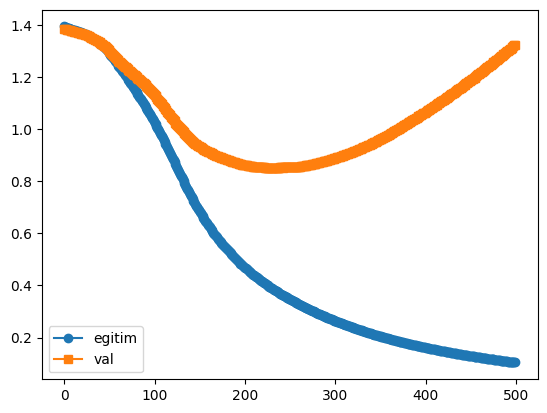

In [20]:
import matplotlib.pyplot as plt
plt.plot(torch.arange(500),egitim_kayiplar,label="egitim",marker="o")
plt.plot(torch.arange(500),val_kayiplar,label="val",marker="s")
plt.legend()
plt.show()

Bu grafikten görüyoruzki egitimi yaklaşık 250 epoch'tan sonra bitirmeliymişiz, çünkü bu noktadan sonra validasyon kaybı (bizim için önemli olan o) artmaya başlıyor.

In [23]:
torch.manual_seed(42)
model=MyFirstMulticlassCLassifier()
optimizer=optim.AdamW(model.parameters(), lr=0.001)

In [24]:
egitim_kayiplar=[]
val_kayiplar=[]
for epoch in range(250):
  model.train()
  egitim_tahmin=model(X_train)
  egitim_kayip=kayip_fonk(egitim_tahmin,y_train)
  egitim_kayiplar.append(egitim_kayip.item())

  egitim_kayip.backward()
  optimizer.step()
  optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    val_tahmin=model(X_val)
    val_kayip=kayip_fonk(val_tahmin,y_val)
    val_kayiplar.append(val_kayip.item())

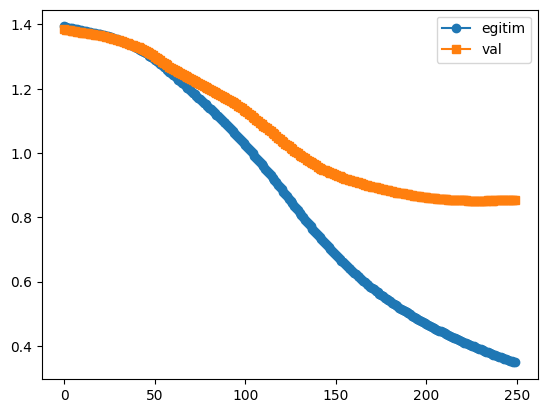

In [25]:
import matplotlib.pyplot as plt
plt.plot(torch.arange(250),egitim_kayiplar,label="egitim",marker="o")
plt.plot(torch.arange(250),val_kayiplar,label="val",marker="s")
plt.legend()
plt.show()

Şu an için test setindeki başarıyı hesaplayalım.

In [28]:
test_cikti=model(X_test)
test_sinif_tahminler=torch.argmax(test_cikti,axis=1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_sinif_tahminler)

0.79

Modelin çalıştığından ve bu modele uygun bir lr'ye sahip olduğumuzdan, bu noktadan sonra modelden eminiz artik eldeki validasyon setini de egitim setine katarak daha buyuk bir egitim seti elde edelim, ve modeli en baştan bunun üzerinde egitelim.

In [37]:
X_train=torch.concat([X_train,X_val],axis=0)
y_train=torch.concat([y_train,y_val],axis=0)

In [38]:
X_train.shape

torch.Size([300, 50])

In [53]:
torch.manual_seed(42)
model=MyFirstMulticlassCLassifier()
optimizer=optim.AdamW(model.parameters(), lr=0.001)

In [54]:
egitim_kayiplar=[]
val_kayiplar=[]
for epoch in range(200):
  model.train()
  egitim_tahmin=model(X_train)
  egitim_kayip=kayip_fonk(egitim_tahmin,y_train)
  egitim_kayiplar.append(egitim_kayip.item())

  egitim_kayip.backward()
  optimizer.step()
  optimizer.zero_grad()

In [55]:
test_cikti=model(X_test)
test_sinif_tahminler=torch.argmax(test_cikti,axis=1)
accuracy_score(y_test,test_sinif_tahminler)

0.82

Bu başarılı modelin her bir sınıfı ayırt etmede ne kadar güçlü olduğuna confusion matrix ile bakalim.

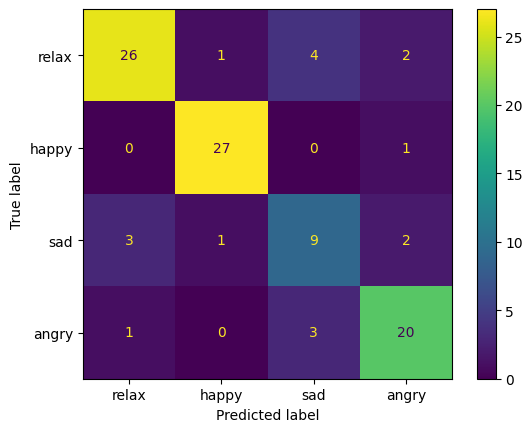

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_sinif_tahminler)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["relax","happy","sad","angry"])
disp.plot()

Buradan görülüyorki model, happy türündeki şarkıları yakalamakta (ayırt etmekte) çok başarılı. Öte yandan modelin sad yani üzgün türdeki şarkılarla rahatlatıcı relax şarkıları birbine karıştırma eğilimi var.

## Modelin Kaydedilmesi

In [ ]:
!pwd

/content/sample_data


In [ ]:
torch.save(model.state_dict(),"seksen_iki_basari.pth")


Bu şekilde modelin katsayılarını kaydetmiş olduk. Daha sonra bu kaydedilmiş katsayıları yeni üretilmiş bir modele direkt giydirebiliriz.

In [ ]:
yeni_model=MyFirstMulticlassCLassifier()

Demekki bir modeli kaydederken ayni zamanda modelin sinifina (örnegin MyFirstMulticlassCLassifier burda) ait yapıyı da bir yere kaydetmemiz gerekir.

In [ ]:
yeni_model.load_state_dict(torch.load("seksen_iki_basari.pth"))

<All keys matched successfully>